In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
logs = pd.read_csv("study_logs/participant_00/mouse_events_participant_0_trial_3.csv")
logs

,participant_id,trial,round,level_of_latency,timestamp_ms,interval_x,interval_y,predicted_x,predicted_y
0,0,3,0,0,1710162134719,0,0,0.0,0.0
1,0,3,0,0,1710162134725,0,0,0.0,0.0
2,0,3,0,0,1710162134731,0,0,0.0,0.0
3,0,3,0,0,1710162134737,0,0,0.0,0.0
4,0,3,0,0,1710162134743,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24545,0,3,34,0,1710162305785,0,0,0.0,0.0
24546,0,3,34,0,1710162305791,0,0,0.0,0.0
24547,0,3,34,0,1710162305797,0,0,0.0,0.0
24548,0,3,34,0,1710162305803,0,1,0.0,0.0


In [26]:
logs_round_1 = logs[logs["round"] == 10]
logs_round_1.reset_index(drop=True, inplace=True)

In [27]:
logs_round_1['round'].unique()

array([10])

In [28]:
to_drop = ["participant_id", "trial", "round", "level_of_latency", "timestamp_ms", "predicted_x", "predicted_y"]
logs_round_1 = logs_round_1.drop(to_drop, axis=1)
logs_round_1 = logs_round_1.cumsum()

In [29]:
logs_round_1

,interval_x,interval_y
0,-1,-1
1,-1,-3
2,-1,-6
3,-1,-9
4,-1,-14
...,...,...
1037,-48,23
1038,-48,23
1039,-48,23
1040,-48,23


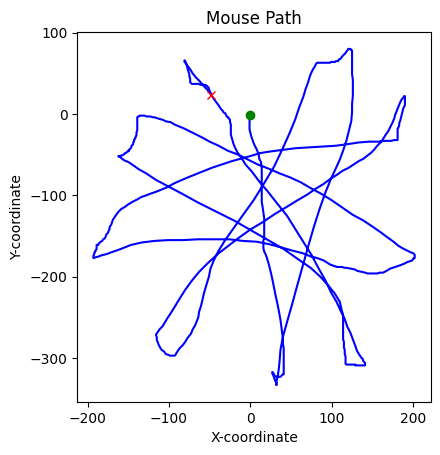

In [30]:
x = logs_round_1['interval_x']
y = logs_round_1['interval_y']

plt.plot(x, y, color="blue")

# Plot start and end points with different colors
plt.plot(x[0], y[0], "go")  # 'ro' specifies red color for the start point
plt.plot(
    x[len(x) - 1], y[len(x) - 1], "rx"
)  # 'go' specifies green color for the end point

# # Set the limits of the axes
# plt.xlim(min(x + y) - 20, max(x + y) + 20)
# plt.ylim(min(x + y) - 20, max(x + y) + 20)

# Set the aspect ratio of the current axes to be equal
plt.gca().set_aspect("equal")

plt.title("Mouse Path")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")

plt.show()